# Очистка данных и обучение моделей

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('data/hackathon_income_train.csv', sep=';')

In [3]:
df_train['dp_ils_total_seniority'].isna().sum()

np.int64(60103)

In [4]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76786 entries, 0 to 76785
Data columns (total 224 columns):
 #    Column                                                                                           Dtype  
---   ------                                                                                           -----  
 0    id                                                                                               int64  
 1    dt                                                                                               object 
 2    target                                                                                           object 
 3    turn_cur_cr_avg_act_v2                                                                           object 
 4    salary_6to12m_avg                                                                                object 
 5    hdb_bki_total_max_limit                                                                          float64
 6

In [5]:
df_test = pd.read_csv('data/hackathon_income_test.csv', sep=';')

In [6]:
df_test.head(10)

,id,dt,turn_cur_cr_avg_act_v2,salary_6to12m_avg,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,avg_cur_cr_turn,...,total_sum,dp_ils_uniq_companies_1y,avg_6m_travel,avg_6m_government_services,hdb_bki_active_cc_max_overdue,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,first_salary_income
0,0,2024-08-31,"805319,38",NaN,61137.47,NaN,60000.0,"159999,0",Женский,"69740,0",...,NaN,NaN,"0,0","0,0",NaN,"80228,0","0,0","1,0",NaN,NaN
1,1,2024-10-31,"306240,0",NaN,949500.00,NaN,230000.0,"108834,0",Мужской,"63513,0",...,"0,0",NaN,"0,0","0,0",0.00,"24888,0","0,0",NaN,NaN,NaN
2,3,2024-09-30,"164908,72999999998",NaN,178000.00,NaN,178000.0,"59203,0",Женский,"132,0",...,"38630,630000000005",NaN,"0,0","0,0",2363.90,"223,0",NaN,NaN,NaN,NaN
3,9,2024-10-31,"2374846,42",NaN,25500.00,"126247,44835851202",4999.0,"180906,0",Женский,"290339,0",...,NaN,"3,0","800,0","0,0",NaN,"25734,0","0,0","7,0","0,0",NaN
4,11,2024-11-30,"735902,71","47828,145620567375",60000.00,NaN,60000.0,"24922,0",Мужской,"76924,0",...,"0,0",NaN,"0,0","0,0",0.00,"1214,0","0,0","15,0",NaN,NaN
5,12,2024-11-30,"1780817,36",NaN,1916000.00,NaN,NaN,"63038,0",Женский,"129995,0",...,NaN,NaN,"0,0","0,0",NaN,"420710,0","0,006578947368421052","13,0",NaN,NaN
6,13,2024-11-30,"741169,96",NaN,150000.00,"164648,48147631905",75000.0,"53896,0",Женский,"137249,0",...,"0,0","1,0","0,0","0,0",0.00,"227659,0",NaN,"4,0",NaN,NaN
7,15,2024-08-31,"1483016,0066666668",NaN,600000.00,NaN,600000.0,"62668,0",Мужской,"907642,0",...,"742,65",NaN,"0,0","25,0",0.00,"893351,0","0,0","23,0","751,0",NaN
8,16,2024-09-30,NaN,NaN,1240000.00,NaN,120000.0,"48659,0",Женский,"0,0",...,"0,0",NaN,NaN,NaN,0.00,"14,0",NaN,NaN,NaN,NaN
9,17,2024-10-31,NaN,NaN,386885.88,NaN,14000.0,NaN,Женский,NaN,...,NaN,NaN,NaN,NaN,669.02,"0,0",NaN,NaN,NaN,NaN


#### Сколько в train пропусков?

In [7]:
df_train.isna().sum()

id                                                  0
dt                                                  0
target                                              0
turn_cur_cr_avg_act_v2                          17708
salary_6to12m_avg                               61911
                                                ...  
label_Above_1M_share_r1                         42776
transaction_category_supermarket_sum_cnt_d15    41852
max_balance_rur_amt_1m_af                       65653
w                                                   0
first_salary_income                             68118
Length: 224, dtype: int64

#### Из целевой переменной делаем типа str делаем float

In [8]:
df_train['target'] = df_train['target'].str.replace(",", ".").astype(np.float64)

#### Логарифмируем целевую переменную

In [9]:
df_train['target'] = np.log1p(df_train['target'])

#### Преобразовываем возвраст в целочисленный тип

In [10]:
df_train['age'] = df_train['age'].str.replace(",", ".").astype(np.float64)
df_train['age'] = df_train['age'].astype(np.float64)

#### Энкодим пол (муж - 0, жен - 1)

In [11]:
d = {'Мужской': 0, 'Женский': 1}

In [12]:
df_train['gender'] = df_train['gender'].map(d)

#### Меняем тип признаку salary_6to12m_avg и логарифмируем его

In [13]:
df_train['salary_6to12m_avg'] = df_train['salary_6to12m_avg'].str.replace(",", ".").astype(np.float64)

In [14]:
df_train['log_salary_6to12m_agg'] = np.log1p(df_train['salary_6to12m_avg'])

In [15]:
df_train['is_salary_known'] = df_train['log_salary_6to12m_agg'].notna().astype(int)

In [16]:
df_train = df_train.drop('salary_6to12m_avg', axis=1)

#### Обработаем регионы

In [17]:
df_train.adminarea.isna().sum()

np.int64(19563)

In [18]:
df_train['adminarea'] = df_train['adminarea'].fillna("unknown")

#### Заполним пропуски в per_capita_income_rur_amt медианой по региону                                 

In [19]:
df_train['per_capita_income_rur_amt'].isna().sum()

np.int64(7394)

In [20]:
df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].str.replace(',', '.').astype(np.float64)

In [21]:
income_per_area = df_train.groupby('adminarea')['per_capita_income_rur_amt'].mean()

In [22]:
df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].fillna(
    df_train['adminarea'].map(income_per_area)
)


In [23]:
df_train.isna().sum()['per_capita_income_rur_amt']

np.int64(0)

#### Просто добавим флаг для NaN в turn_other_cr_avg_act_v2

In [24]:
df_train['turn_other_cr_avg_act_v2'] = df_train['turn_other_cr_avg_act_v2'].str.replace(',', '.').astype(np.float64)

In [25]:
df_train['is_na_turn_other_cr_avg_act_v2'] = df_train['turn_other_cr_avg_act_v2'].isna().astype(int)

In [26]:
df_train['log_turn_other_cr_avg_act_v2'] = np.log1p(df_train['turn_other_cr_avg_act_v2'])
df_train = df_train.drop('turn_other_cr_avg_act_v2', axis=1)

#### Обработаем долю транзакций в супермаркетах

In [27]:
df_train['transaction_category_supermarket_sum_cnt_m2'] = \
df_train['transaction_category_supermarket_sum_cnt_m2'].str.replace(',', '.').astype(np.float64)

In [28]:
df_train['transaction_category_supermarket_percent_cnt_2m'] = \
df_train['transaction_category_supermarket_percent_cnt_2m'].str.replace(',', '.').astype(np.float64)

In [29]:
df_train[df_train['transaction_category_supermarket_sum_cnt_m2'] == 0]
# Нет пользователей, которые не тратили бы в магазинах

,id,dt,target,turn_cur_cr_avg_act_v2,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,avg_cur_cr_turn,...,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,w,first_salary_income,log_salary_6to12m_agg,is_salary_known,is_na_turn_other_cr_avg_act_v2,log_turn_other_cr_avg_act_v2


In [30]:
df_train['transaction_category_supermarket_percent_cnt_2m'] = \
df_train['transaction_category_supermarket_percent_cnt_2m'].fillna(df_train['transaction_category_supermarket_percent_cnt_2m'].mean())

#### Обработаем количество транзакций в реторане

In [31]:
df_train['transaction_category_restaurants_sum_amt_m2'] = \
df_train['transaction_category_restaurants_sum_amt_m2'].str.replace(',', '.').astype(np.float64)

In [32]:
# Заполним в данном признаке пропуски нулями тк не все ходят в рестораны
df_train['transaction_category_restaurants_sum_amt_m2'] = df_train['transaction_category_restaurants_sum_amt_m2'].fillna(0.0)

In [33]:
df_train['log_transaction_category_restaurants_sum_amt_m2'] = np.log1p(df_train['transaction_category_restaurants_sum_amt_m2'])

In [34]:
df_train = df_train.drop('transaction_category_restaurants_sum_amt_m2', axis=1)

#### Обработаем количество транзакций по отелям

In [35]:
df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].str.replace(',', '.').astype(np.float64)

df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].fillna(0.0)

df_train['log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
np.log1p(df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'])

df_train = df_train.drop('avg_by_category__amount__sum__cashflowcategory_name__puteshestvija', axis=1)

#### Обработаем веса

In [36]:
df_train['w'] = df_train['w'].str.replace(',', '.').astype(np.float64)

## Итоговый датасет

In [37]:
df = df_train[['target', 'age', 'gender', 'log_salary_6to12m_agg', 'is_salary_known', 
    'per_capita_income_rur_amt', 'log_turn_other_cr_avg_act_v2', 'is_na_turn_other_cr_avg_act_v2', 'transaction_category_supermarket_percent_cnt_2m',
    'log_transaction_category_restaurants_sum_amt_m2', 'log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija', 'w']]

In [38]:
X, y = df.drop('target', axis=1), df['target']

## Обучаем бейзлайн

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
weights_train = X_train['w']
weights_val = X_val['w']

X_train = X_train.drop('w', axis=1)
X_val = X_val.drop('w', axis=1)

In [45]:
from catboost import CatBoostRegressor, Pool

In [44]:
cat_features = ['is_salary_known', 'is_na_turn_other_cr_avg_act_v2']  

train_pool = Pool(
    data=X_train, 
    label=y_train, 
    weight=weights_train,
    cat_features=cat_features
)

valid_pool = Pool(
    data=X_val, 
    label=y_val, 
    weight=weights_val,
    cat_features=cat_features
)


model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MAE',   
    eval_metric='MAE',     
    random_seed=42,
    verbose=100
)

# Обучаем модель
model.fit(
    train_pool,
    eval_set=valid_pool,
    early_stopping_rounds=50
)

0:	learn: 0.9375766	test: 0.9395731	best: 0.9395731 (0)	total: 147ms	remaining: 2m 26s
100:	learn: 0.6529426	test: 0.6595651	best: 0.6595651 (100)	total: 634ms	remaining: 5.64s
200:	learn: 0.6510958	test: 0.6582839	best: 0.6582839 (200)	total: 1.12s	remaining: 4.46s
300:	learn: 0.6506867	test: 0.6579674	best: 0.6579372 (290)	total: 1.6s	remaining: 3.73s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6579372364
bestIteration = 290

Shrink model to first 291 iterations.


In [54]:
#WMAE
def weighted_mean_absolute_error(y_true, y_pred, weights):
    return (weights * np.abs(y_true - y_pred)).mean()

In [46]:
y_valid = np.expm1(y_val)
y_pred = np.expm1(model.predict(X_val))
weighted_mean_absolute_error(y_valid, y_pred, weights_val)

np.float64(54835.1112015122)

In [40]:
def categorize_position(position):
    if pd.isna(position):
        return 'unknown'
    
    position_lower = str(position).lower()
    
    if any(word in position_lower for word in ['руководитель', 'директор', 'начальник', 'заведующий', 'управляющий']):
        return 'management'
    
    elif any(word in position_lower for word in ['специалист', 'менеджер', 'аналитик', 'эксперт']):
        return 'specialist'
    
    elif any(word in position_lower for word in ['программист', 'разработчик', 'инженер', 'техник']):
        return 'it_tech'
    
    elif any(word in position_lower for word in ['рабочий', 'оператор', 'водитель', 'грузчик']):
        return 'worker'
    
    elif any(word in position_lower for word in ['продавец', 'консультант', 'кассир', 'официант']):
        return 'service'
    
    elif any(word in position_lower for word in ['врач', 'медик', 'медсестра', 'фельдшер']):
        return 'medical'
    
    elif any(word in position_lower for word in ['преподаватель', 'учитель', 'педагог']):
        return 'education'
    
    elif any(word in position_lower for word in ['бухгалтер', 'экономист', 'финансист']):
        return 'finance'
    
    else:
        return 'other'

In [41]:
def preprocess_train(df_train):

    df_train['target'] = df_train['target'].str.replace(",", ".").astype(np.float64)
    df_train['target'] = np.log1p(df_train['target'])
    
    df_train['age'] = df_train['age'].str.replace(",", ".").astype(np.float64)
    df_train['age'] = df_train['age'].astype(np.float64)

    

    d = {'Мужской': 0, 'Женский': 1}
    df_train['gender'] = df_train['gender'].map(d)
    
    df_train['salary_6to12m_avg'] = df_train['salary_6to12m_avg'].str.replace(",", ".").astype(np.float64)
    df_train['log_salary_6to12m_agg'] = np.log1p(df_train['salary_6to12m_avg'])
    df_train['is_salary_known'] = df_train['log_salary_6to12m_agg'].notna().astype(int)
    df_train = df_train.drop('salary_6to12m_avg', axis=1)

    df_train['adminarea'] = df_train['adminarea'].fillna("unknown")
    df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].str.replace(',', '.').astype(np.float64)
    income_per_area = df_train.groupby('adminarea')['per_capita_income_rur_amt'].mean()
    df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].fillna(
        df_train['adminarea'].map(income_per_area)
    )

    df_train['turn_other_cr_avg_act_v2'] = df_train['turn_other_cr_avg_act_v2'].str.replace(',', '.').astype(np.float64)
    df_train['log_turn_other_cr_avg_act_v2'] = np.log1p(df_train['turn_other_cr_avg_act_v2'])
    df_train = df_train.drop('turn_other_cr_avg_act_v2', axis=1)

    df_train['transaction_category_supermarket_percent_cnt_2m'] = \
    df_train['transaction_category_supermarket_percent_cnt_2m'].str.replace(',', '.').astype(np.float64)
    df_train['transaction_category_supermarket_percent_cnt_2m'] = \
    df_train['transaction_category_supermarket_percent_cnt_2m'].fillna(df_train['transaction_category_supermarket_percent_cnt_2m'].mean())

    df_train['transaction_category_restaurants_sum_amt_m2'] = \
    df_train['transaction_category_restaurants_sum_amt_m2'].str.replace(',', '.').astype(np.float64)
    df_train['transaction_category_restaurants_sum_amt_m2'] = df_train['transaction_category_restaurants_sum_amt_m2'].fillna(0.0)
    df_train['log_transaction_category_restaurants_sum_amt_m2'] = np.log1p(df_train['transaction_category_restaurants_sum_amt_m2'])
    df_train = df_train.drop('transaction_category_restaurants_sum_amt_m2', axis=1)

    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].str.replace(',', '.').astype(np.float64)

    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].fillna(0.0)

    df_train['log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
    np.log1p(df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'])

    df_train = df_train.drop('avg_by_category__amount__sum__cashflowcategory_name__puteshestvija', axis=1)

    df_train['dp_ils_avg_salary_1y'] = np.log1p(df_train['dp_ils_avg_salary_1y'].str.replace(',', '.').astype(np.float64))
    df_train['turn_save_cr_max_v2'] = np.log1p(df_train['turn_save_cr_max_v2'].str.replace(',', '.').astype(np.float64))
    
    df_train['w'] = df_train['w'].str.replace(',', '.').astype(np.float64)

    df_train['interaction'] = df_train['age'] * df_train['log_salary_6to12m_agg']
    df_train['salary_vs_region'] = df_train['log_salary_6to12m_agg'] / df_train['per_capita_income_rur_amt']
    #df_train['salary_change'] = df_train['log_turn_other_cr_avg_act_v2'] - df_train['dp_ils_avg_salary_1y']
    #df_train['credit_vs_salary'] = df_train['log_turn_other_cr_avg_act_v2'] / df_train['log_salary_6to12m_agg']

    df_train['incomeValue'] = df_train['incomeValue'].str.replace(',', '.').astype(np.float64)
    df_train['hdb_bki_total_max_limit'] = np.log1p(df_train['hdb_bki_total_max_limit'])
    df_train['dp_ewb_last_employment_position'] = df_train['dp_ewb_last_employment_position'].map(categorize_position)

    return df_train[['target', 'age', 'w', 'gender', 'log_salary_6to12m_agg', 'is_salary_known', 
                     'per_capita_income_rur_amt', 'log_turn_other_cr_avg_act_v2', 'transaction_category_supermarket_percent_cnt_2m',
                     'log_transaction_category_restaurants_sum_amt_m2', 'log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija', 'dp_ils_avg_salary_1y', 
                     'turn_save_cr_max_v2', 'interaction', 'salary_vs_region', 'incomeValue',
                    'hdb_bki_total_max_limit', 'dp_ewb_last_employment_position']]

In [76]:
def preprocess_test(df_train):
    df_train['age'] = df_train['age'].str.replace(",", ".").astype(np.float64)
    df_train['age'] = df_train['age'].astype(np.float64)

    d = {'Мужской': 0, 'Женский': 1}
    df_train['gender'] = df_train['gender'].map(d)
    
    df_train['salary_6to12m_avg'] = df_train['salary_6to12m_avg'].str.replace(",", ".").astype(np.float64)
    df_train['log_salary_6to12m_agg'] = np.log1p(df_train['salary_6to12m_avg'])
    df_train['is_salary_known'] = df_train['log_salary_6to12m_agg'].notna().astype(int)
    df_train = df_train.drop('salary_6to12m_avg', axis=1)

    df_train['adminarea'] = df_train['adminarea'].fillna("unknown")
    df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].str.replace(',', '.').astype(np.float64)
    income_per_area = df_train.groupby('adminarea')['per_capita_income_rur_amt'].mean()
    df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].fillna(
        df_train['adminarea'].map(income_per_area)
    )

    df_train['turn_other_cr_avg_act_v2'] = df_train['turn_other_cr_avg_act_v2'].str.replace(',', '.').astype(np.float64)
    df_train['log_turn_other_cr_avg_act_v2'] = np.log1p(df_train['turn_other_cr_avg_act_v2'])
    df_train = df_train.drop('turn_other_cr_avg_act_v2', axis=1)

    df_train['transaction_category_supermarket_percent_cnt_2m'] = \
    df_train['transaction_category_supermarket_percent_cnt_2m'].str.replace(',', '.').astype(np.float64)
    df_train['transaction_category_supermarket_percent_cnt_2m'] = \
    df_train['transaction_category_supermarket_percent_cnt_2m'].fillna(df_train['transaction_category_supermarket_percent_cnt_2m'].mean())

    df_train['transaction_category_restaurants_sum_amt_m2'] = \
    df_train['transaction_category_restaurants_sum_amt_m2'].str.replace(',', '.').astype(np.float64)
    df_train['transaction_category_restaurants_sum_amt_m2'] = df_train['transaction_category_restaurants_sum_amt_m2'].fillna(0.0)
    df_train['log_transaction_category_restaurants_sum_amt_m2'] = np.log1p(df_train['transaction_category_restaurants_sum_amt_m2'])
    df_train = df_train.drop('transaction_category_restaurants_sum_amt_m2', axis=1)

    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].str.replace(',', '.').astype(np.float64)

    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].fillna(0.0)

    df_train['log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
    np.log1p(df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'])

    df_train = df_train.drop('avg_by_category__amount__sum__cashflowcategory_name__puteshestvija', axis=1)

    df_train['dp_ils_avg_salary_1y'] = np.log1p(df_train['dp_ils_avg_salary_1y'].str.replace(',', '.').astype(np.float64))
    df_train['salary_median_in_gex_r1'] = np.log1p(df_train['salary_median_in_gex_r1'].str.replace(',', '.').astype(np.float64))
    df_train['turn_save_cr_max_v2'] = np.log1p(df_train['turn_save_cr_max_v2'].str.replace(',', '.').astype(np.float64))

    df_train['interaction'] = df_train['age'] * df_train['log_salary_6to12m_agg']
    df_train['salary_vs_region'] = df_train['log_salary_6to12m_agg'] / df_train['per_capita_income_rur_amt']
    #df_train['salary_change'] = df_train['log_turn_other_cr_avg_act_v2'] - df_train['dp_ils_avg_salary_1y']
    #df_train['credit_vs_salary'] = df_train['log_turn_other_cr_avg_act_v2'] / df_train['log_salary_6to12m_agg']

    df_train['incomeValue'] = df_train['incomeValue'].str.replace(',', '.').astype(np.float64)
    df_train['hdb_bki_total_max_limit'] = np.log1p(df_train['hdb_bki_total_max_limit'])
    df_train['dp_ewb_last_employment_position'] = df_train['dp_ewb_last_employment_position'].map(categorize_position)

    return df_train[['age', 'gender', 'log_salary_6to12m_agg', 'is_salary_known', 
                     'per_capita_income_rur_amt', 'log_turn_other_cr_avg_act_v2', 'transaction_category_supermarket_percent_cnt_2m',
                     'log_transaction_category_restaurants_sum_amt_m2', 'log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija', 'dp_ils_avg_salary_1y', 
                     'turn_save_cr_max_v2', 'interaction', 'salary_vs_region', 'incomeValue',
                    'hdb_bki_total_max_limit', 'dp_ewb_last_employment_position']]

#### Тестирую модель

In [70]:
df_train = pd.read_csv('data/hackathon_income_train.csv', sep=';')
df_test = pd.read_csv('data/hackathon_income_test.csv', sep=';')



df_train = preprocess_train(df_train)
df_test = preprocess_test(df_test)

X, y = df_train.drop('target', axis=1), df_train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

weights_train = X_train['w']
weights_val = X_val['w']

X_train = X_train.drop('w', axis=1)
X_val = X_val.drop('w', axis=1)

cat_features = ['is_salary_known', 'dp_ewb_last_employment_position', 'gender']  

train_pool = Pool(
    data=X_train, 
    label=y_train, 
    weight=weights_train,
    cat_features=cat_features
)

valid_pool = Pool(
    data=X_val, 
    label=y_val, 
    weight=weights_val,
    cat_features=cat_features
)


model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MAE',   
    eval_metric='MAE',     
    random_seed=42,
    verbose=100
)

# Обучаем модель

In [297]:
y_valid = np.expm1(y_val)
y_pred = np.expm1(model.predict(X_val))
weighted_mean_absolute_error(y_valid, y_pred, weights_val)

np.float64(46525.2672653444)

## Model tuning

In [49]:
import optuna
def objective(trial):
    params = {
        'iterations': 5000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_seed': 42,
        'loss_function': 'MAE',
        'eval_metric': 'MAE',
        'early_stopping_rounds': 100,
        'verbose': 0
    }
    
    model = CatBoostRegressor(**params)
    model.fit(train_pool, eval_set=valid_pool)
    
    y_pred_real = np.expm1(model.predict(X_val))
    
    
    y_val_real = np.expm1(y_val)
    wmae =  wmae = np.sum(weights_val * np.abs(y_val_real - y_pred_real)) / np.sum(weights_val)
    
    return wmae  # цель — минимизировать

In [50]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, n_jobs=10)  # количество проб можно увеличить
print("Лучшие параметры:", study.best_params)
print("Лучший WMAE:", study.best_value)

[I 2025-11-30 01:09:01,202] A new study created in memory with name: no-name-990d23d9-d043-4c97-bc40-2946a5635854
[I 2025-11-30 01:09:37,969] Trial 0 finished with value: 83067.82468051894 and parameters: {'learning_rate': 0.15481755892980772, 'depth': 9, 'l2_leaf_reg': 7.562645238549216}. Best is trial 0 with value: 83067.82468051894.
[I 2025-11-30 01:10:03,752] Trial 4 finished with value: 82093.8538275491 and parameters: {'learning_rate': 0.11271401338898639, 'depth': 8, 'l2_leaf_reg': 1.3407074499264995}. Best is trial 4 with value: 82093.8538275491.
[I 2025-11-30 01:10:06,841] Trial 7 finished with value: 82084.02238466383 and parameters: {'learning_rate': 0.14373094867034708, 'depth': 6, 'l2_leaf_reg': 4.509101660422728}. Best is trial 7 with value: 82084.02238466383.
[I 2025-11-30 01:10:09,035] Trial 5 finished with value: 82110.45134897277 and parameters: {'learning_rate': 0.11175728939100306, 'depth': 8, 'l2_leaf_reg': 8.388001542023192}. Best is trial 7 with value: 82084.0223

Лучшие параметры: {'learning_rate': 0.029931832032484347, 'depth': 6, 'l2_leaf_reg': 3.78929623881488}
Лучший WMAE: 81325.42083111199


In [71]:
best_params = study.best_params
model = CatBoostRegressor(**best_params)

model.fit(train_pool)

0:	learn: 1.0676766	total: 33.2ms	remaining: 33.2s
1:	learn: 1.0542994	total: 64.6ms	remaining: 32.2s
2:	learn: 1.0415093	total: 99.6ms	remaining: 33.1s
3:	learn: 1.0292717	total: 134ms	remaining: 33.5s
4:	learn: 1.0177563	total: 171ms	remaining: 34s
5:	learn: 1.0066489	total: 201ms	remaining: 33.3s
6:	learn: 0.9962147	total: 237ms	remaining: 33.6s
7:	learn: 0.9860881	total: 275ms	remaining: 34.1s
8:	learn: 0.9762117	total: 313ms	remaining: 34.5s
9:	learn: 0.9669115	total: 347ms	remaining: 34.3s
10:	learn: 0.9582676	total: 381ms	remaining: 34.3s
11:	learn: 0.9493804	total: 418ms	remaining: 34.4s
12:	learn: 0.9408947	total: 453ms	remaining: 34.4s
13:	learn: 0.9330763	total: 489ms	remaining: 34.5s
14:	learn: 0.9253181	total: 524ms	remaining: 34.4s
15:	learn: 0.9180294	total: 558ms	remaining: 34.3s
16:	learn: 0.9108484	total: 593ms	remaining: 34.3s
17:	learn: 0.9043728	total: 627ms	remaining: 34.2s
18:	learn: 0.8980028	total: 661ms	remaining: 34.1s
19:	learn: 0.8918379	total: 696ms	remain

In [72]:
y_valid = np.expm1(y_val)
y_pred = np.expm1(model.predict(X_val))
weighted_mean_absolute_error(y_valid, y_pred, weights_val)

np.float64(43062.99325875314)

In [73]:
df_train = pd.read_csv('data/hackathon_income_train.csv', sep=';')

df = preprocess_train(df_train)
cat_features = ['is_salary_known', 'dp_ewb_last_employment_position', 'gender'] 

X, y = df.drop('target', axis=1), df['target']
W = X['w']
X = X.drop('w', axis=1)

In [74]:
cat_features = ['is_salary_known', 'dp_ewb_last_employment_position', 'gender']  

full_train_pool = Pool(
    data=X,
    label=y,   
    weight=W,
    cat_features=cat_features
)

model.fit(full_train_pool)

0:	learn: 1.0681261	total: 36.4ms	remaining: 36.3s
1:	learn: 1.0550417	total: 71.5ms	remaining: 35.7s
2:	learn: 1.0424221	total: 112ms	remaining: 37.1s
3:	learn: 1.0306435	total: 150ms	remaining: 37.4s
4:	learn: 1.0190469	total: 195ms	remaining: 38.7s
5:	learn: 1.0080251	total: 235ms	remaining: 39s
6:	learn: 0.9972198	total: 280ms	remaining: 39.8s
7:	learn: 0.9873621	total: 337ms	remaining: 41.8s
8:	learn: 0.9775934	total: 387ms	remaining: 42.6s
9:	learn: 0.9681181	total: 425ms	remaining: 42.1s
10:	learn: 0.9592263	total: 463ms	remaining: 41.6s
11:	learn: 0.9505199	total: 502ms	remaining: 41.3s
12:	learn: 0.9424334	total: 542ms	remaining: 41.1s
13:	learn: 0.9345681	total: 581ms	remaining: 40.9s
14:	learn: 0.9269855	total: 618ms	remaining: 40.6s
15:	learn: 0.9197116	total: 655ms	remaining: 40.3s
16:	learn: 0.9127507	total: 696ms	remaining: 40.3s
17:	learn: 0.9058321	total: 737ms	remaining: 40.2s
18:	learn: 0.8993010	total: 776ms	remaining: 40s
19:	learn: 0.8934392	total: 813ms	remaining

In [77]:
df_test = pd.read_csv('data/hackathon_income_test.csv', sep=';')
df = preprocess_test(df_test)
y_pred = model.predict(df)
y_pred = np.expm1(y_pred)
df_test['target'] = y_pred
df_test[['id', 'target']].set_index('id').to_csv('submission3.csv', decimal='.', sep=',')

In [66]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73214 entries, 0 to 73213
Data columns (total 17 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   age                                                                     73214 non-null  float64
 1   gender                                                                  73214 non-null  int64  
 2   log_salary_6to12m_agg                                                   7634 non-null   float64
 3   is_salary_known                                                         73214 non-null  int64  
 4   per_capita_income_rur_amt                                               73214 non-null  float64
 5   log_turn_other_cr_avg_act_v2                                            42681 non-null  float64
 6   transaction_category_supermarket_percent_cnt_2m                         73214 

## Объяснение работы модели

In [620]:
model.save_model("best_catboost_model.onnx", format="onnx")

C:\Users\m4rce\Documents\Programming\TrafficSignNet\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


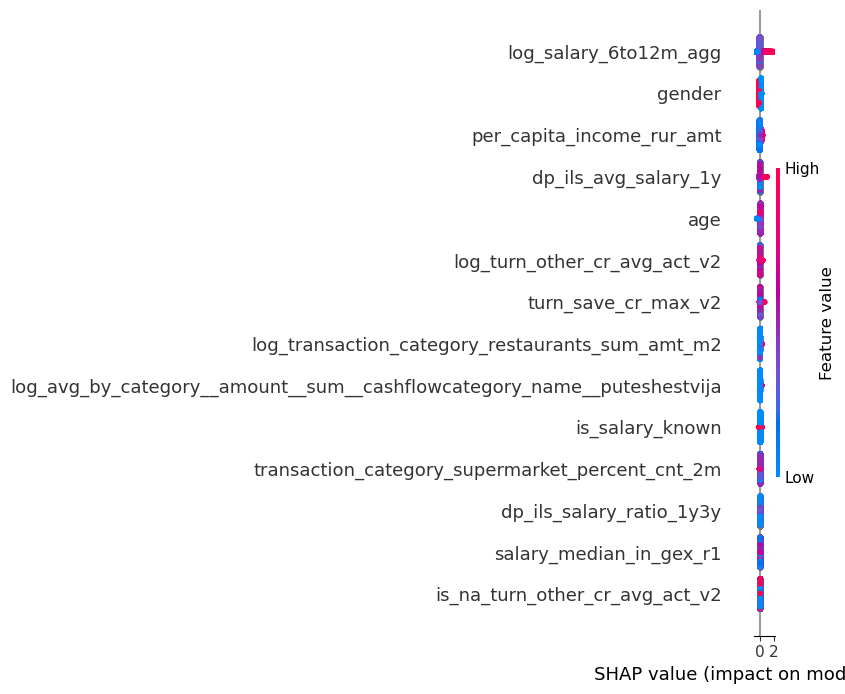

In [73]:
import shap

# Если модель обучена на Pool, важно указать cat_features
pool = Pool(X_train, cat_features=cat_features)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(pool)

# Summary plot
shap.summary_plot(shap_values, X_train)

In [298]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,log_salary_6to12m_agg,23.935734
1,dp_ils_avg_salary_1y,15.009948
2,hdb_bki_total_max_limit,14.997273
3,incomeValue,10.809164
4,gender,6.363405
5,turn_save_cr_max_v2,4.741359
6,per_capita_income_rur_amt,4.115570
7,age,3.799008
8,is_salary_known,2.846077
9,log_transaction_category_restaurants_sum_amt_m2,2.800419
